RESTAURANT REVIEW ANALYSIS USING ML & NLP METHODS

SOFTWARE DESIGN AND DEVELOPMENT PROJECT

GUIDED BY - PROF. MARIA ANU (52310)

SUBMITTED BY - HEMA CHANDRIKA S (19MIS1199)

IMPLEMENTATION OF ML MODELS

IMPORTING THE DEPENDENCIES


In [ ]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

READING THE CSV FILE

In [ ]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

DATA EXPLORATION

DISPLAYING THE FIRST FIVE CONTENTS OF THE FILE

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


DISPLAYING THE LAST FIVE CONTENTS OF THE FILE

In [ ]:
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


SUMMARY OF THE DATASET

In [ ]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


PAIRWISE CORRELATION

In [ ]:
dataset.corr()

<ipython-input-8-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Liked
Liked,1.0


PLOTING THE RATIO OF POSITIVE AND NEGATIVE REVIEWS

<Axes: >

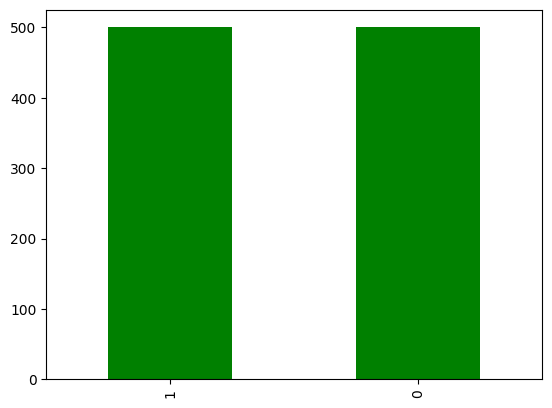

In [ ]:
dataset['Liked'].value_counts().plot.bar(color = 'green')

TEXT MINING - REMOVAL OF STOPWORDS

In [ ]:
nltk.download('stopwords')
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not


CREATING BAG OF WORDS MODEL

In [ ]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 1500)
(800,)
(200, 1500)
(200,)


MINIMUM AND MAXIMUM SCALING


In [ ]:
from sklearn.preprocessing import MinMaxScaler

CREATING MINIMUM AND MAXIMUM SCALER

In [ ]:
mm = MinMaxScaler()

FEEDING THE INDEPENDENT VARIABLES INTO THE MODEL

In [ ]:
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report

1) NAIVE BAYES CLASSIFIER ON TRAIN SET

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

CREATING THE MODEL

In [ ]:
model = GaussianNB()

FITTING THE TRAINING DATA TO THE MODEL

In [ ]:
model.fit(X_train, y_train)

GaussianNB()

PREDICTING THE TEST SET RESULTS

In [ ]:
y_pred = model.predict(X_test)

CHECKING THE ACCURACIES

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.92125
Testing Accuracy : 0.725


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        97
           1       0.68      0.87      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.72      0.72       200
weighted avg       0.74      0.72      0.72       200



CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[55 42]
 [13 90]]


2) RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

CREATING THE MODEL

In [ ]:
model = RandomForestClassifier()

FITTING THE TRAINING DATA TO THE MODEL

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

PREDICTING THE TEST SET RESULTS

In [ ]:
y_pred = model.predict(X_test)

CHECKING THE ACCURACIES

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.99625
Testing Accuracy : 0.745


CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[88  9]
 [42 61]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        97
           1       0.87      0.59      0.71       103

    accuracy                           0.74       200
   macro avg       0.77      0.75      0.74       200
weighted avg       0.78      0.74      0.74       200



3) DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

CREATING THE MODEL

In [ ]:
model = DecisionTreeClassifier()

FITTING THE TRAINING DATA TO THE MODEL

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

PREDICTING THE TEST SET RESULTS

In [ ]:
y_pred = model.predict(X_test)


CHECKING THE ACCURACIES

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.99625
Testing Accuracy : 0.74


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        97
           1       0.79      0.67      0.73       103

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[79 18]
 [34 69]]


4) LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

CREATING THE MODEL

In [ ]:
model = LogisticRegression()

FITTING THE TRAINING DATA TO THE MODEL

In [ ]:
model.fit(X_train, y_train)


LogisticRegression()

PREDICTING THE TEST SET RESULTS

In [ ]:
y_pred = model.predict(X_test)

CHECKING THE ACCURACIES

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))


Training Accuracy : 0.96875
Testing Accuracy : 0.785


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        97
           1       0.82      0.75      0.78       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[80 17]
 [26 77]]


5) SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

CREATING THE MODEL

In [ ]:
model = SVC()

FITTING THE TRAINING DATA TO THE MODEL

In [ ]:
model.fit(X_train, y_train)

SVC()

PREDICTING THE TEST SET RESULTS

In [ ]:
y_pred = model.predict(X_test)


CHECKING THE ACCURACIES

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.98
Testing Accuracy : 0.775


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        97
           1       0.87      0.66      0.75       103

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.77       200
weighted avg       0.79      0.78      0.77       200



CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[87 10]
 [35 68]]


6) MULTI LAYER PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

CREATING THE MODEL

In [ ]:
model = MLPClassifier()

FITTING THE TRAINING DATA TO THE MODEL

In [ ]:
model.fit(X_train, y_train)

MLPClassifier()

PREDICTING THE TEST SET RESULTS

In [ ]:
y_pred = model.predict(X_test)

CHECKING THE ACCURACIES

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.9925
Testing Accuracy : 0.775


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        97
           1       0.80      0.75      0.77       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[76 21]
 [25 78]]


INFERENCE:
LOGISTIC REGRESSION GIVES THE HIGHEST ACCURACY OF 78.5% OUT OF ALL MODELS

CREATING WORDCLOUD

In [ ]:
!pip install wordcloud

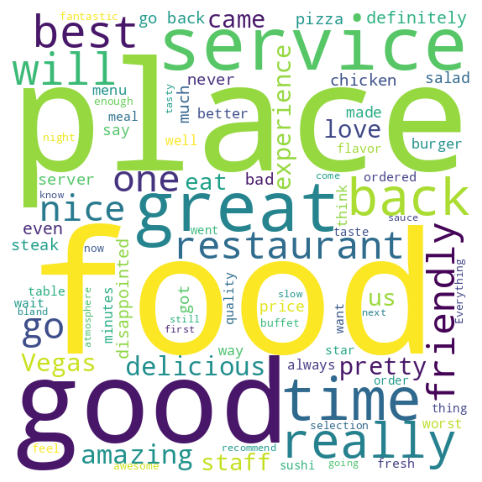

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt

def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS)

    # Create WordCloud
    word_cloud = WordCloud(width = 550, height = 550,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 12).generate(text)

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6))

    # Show image
    plt.imshow(word_cloud)

    # Remove Axis
    plt.axis("off")

    # show plot
    plt.show()

paragraph=' '.join(dataset.Review.tolist())
word_cloud(paragraph)

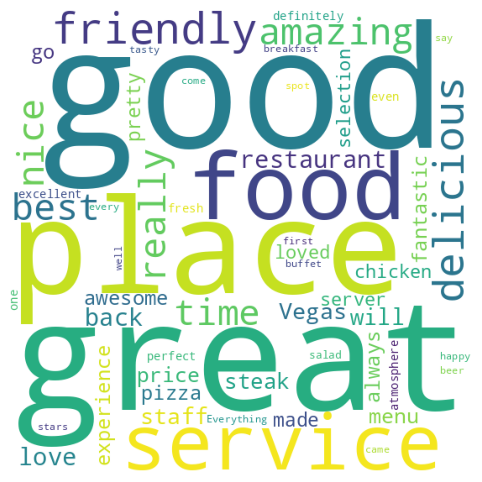

In [ ]:
paragraph=' '.join(dataset[dataset.Liked==1].Review.tolist())
word_cloud(paragraph)

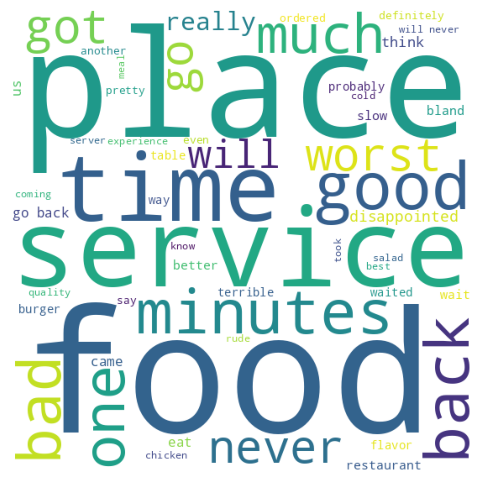

In [ ]:
paragraph=' '.join(dataset[dataset.Liked==0].Review.tolist())
word_cloud(paragraph)